In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taban123456","key":"0e301cbc4b47db5ed837878cdfc1c469"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 95% 314M/330M [00:02<00:00, 174MB/s]
100% 330M/330M [00:02<00:00, 155MB/s]


In [6]:
!unzip face-mask-12k-images-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/WithoutMask/

In [7]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 180 kB 45.5 MB/s 
     |████████████████████████████████| 139 kB 50.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=217a512ec6cfd04e0c268e796c577319b41ccd96c9010d996e7b03b7716cc3aa
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=073b326dc83e14d02e905a510cb9fa761e12034700d09e84ed804b649667819f
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras import models ,layers, optimizers,losses
from  tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import wandb
from wandb.keras import WandbCallback
import seaborn as sn

In [9]:
batch_size = 256
epochs = 5
lr = 0.001
width = height = 256

In [10]:
data_generator = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip = True)

In [11]:
train_data = data_generator.flow_from_directory('Face Mask Dataset/Train',
                                                batch_size = batch_size,
                                                shuffle = True,
                                                class_mode = 'categorical',
                                                target_size = (width , height) )

Found 10000 images belonging to 2 classes.


In [12]:
val_data = data_generator.flow_from_directory('Face Mask Dataset/Validation',
                                                batch_size = batch_size,
                                                shuffle = True,
                                                class_mode = 'categorical',
                                                target_size = (width , height) )

Found 800 images belonging to 2 classes.


In [13]:
base_model = tf.keras.applications.ResNet50V2(
    input_shape = (width,height,3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'max'
)

94683136/94668760 [==============================] - 1s 0us/step


In [14]:
for layer in base_model.layers[:-8]:
  layer.trainable = False

In [15]:
!pip  install wandb

In [16]:
wandb.init(project="Mask_Detection")

config = wandb.config
config.learning_rate = 0.001

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [17]:
model=tf.keras.Sequential([
                           base_model,
                           layers.Dense(2,activation='sigmoid')
])

In [18]:

model.compile(optimizer=optimizers.RMSprop(learning_rate=config.learning_rate),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=val_data,
                    callbacks = [WandbCallback()])

Epoch 1/5
40/40 [==============================] - 129s 2s/step - loss: 0.5411 - acc: 0.9682 - val_loss: 0.2315 - val_acc: 0.9887


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
40/40 [==============================] - 79s 2s/step - loss: 0.0179 - acc: 0.9985 - val_loss: 0.6246 - val_acc: 0.9737
Epoch 3/5
40/40 [==============================] - 79s 2s/step - loss: 0.0127 - acc: 0.9990 - val_loss: 0.6082 - val_acc: 0.9775
Epoch 4/5
40/40 [==============================] - 79s 2s/step - loss: 0.0031 - acc: 0.9996 - val_loss: 0.0828 - val_acc: 0.9912
Epoch 5/5
40/40 [==============================] - 79s 2s/step - loss: 0.0046 - acc: 0.9995 - val_loss: 0.2834 - val_acc: 0.9900


In [19]:
test_data = data_generator.flow_from_directory('Face Mask Dataset/Test',
                                                batch_size = batch_size,
                                                shuffle = False,
                                                class_mode = 'categorical',
                                                target_size = (width , height) )

Found 992 images belonging to 2 classes.


In [20]:
model.evaluate(test_data)

4/4 [==============================] - 16s 5s/step - loss: 0.2426 - acc: 0.9940


[0.24263766407966614, 0.9939516186714172]

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis = 1)
print('confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))

target_names = list(test_data.class_indices.keys())
print('Classification Report')
print(classification_report(test_data.classes, y_pred, target_names=target_names))

confusion Matrix
[[483   0]
 [  8 501]]
Classification Report
              precision    recall  f1-score   support

    WithMask       0.98      1.00      0.99       483
 WithoutMask       1.00      0.98      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [22]:
!pip install retina-face

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.1-py3-none-any.whl size=9920 sha256=6aefa11e88127f2e04f62cbac985c12c4bedeea73f715d1465d27993ffd74519
  Stored in directory: /root/.cache/pip/wheels/f2/8d/0b/2e7e6c725f898bd7ef654b660528e459a4d79f3a68976ca9fc
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [23]:
import cv2
from retinaface import RetinaFace

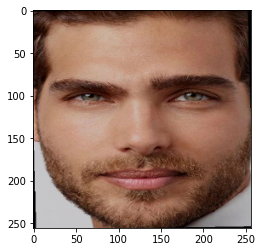

ماسک نداره


In [36]:

import matplotlib.pyplot as plt
def process_and_predict(image_path):

  faces = RetinaFace.extract_faces(img_path = image_path, align = True)
  image = faces[0]
  image = cv2.resize(image,(width,height))
  image = image/255.0
  img2 = image.reshape(1,256,256,3)
  plt.imshow(image)
  plt.show()
  result = model.predict(img2)
  if np.argmax(result)==1:
    print('ماسک نداره')
  else:
    print('ماسک داره')
  
process_and_predict('2')

  